___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Quick Guide to Facebook's Prophet Basics
---
---

## IMPORTANT NOTE ONE:

**You should really read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU MAY NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**
    * PLEASE READ THROUGH THE DOCS AND STACKOERFLOW CAREFULLY BEFORE POSTING INSTALLATION ISSUES TO THE QA FORUMS.

-----
----

## Load Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [2]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [4]:
df.columns = ['ds','y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [6]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\JamesDuong\AppData\Local\Continuum\anaconda3\envs\DS\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [7]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [8]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [9]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [10]:
len(df)

324

In [11]:
len(future)

348


### Step 2: Predict and fill in the Future

In [12]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.389678,1151.187618,1474.389013,1778.389678,1778.389678,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,0.0,0.0,0.0,1316.488218
1,1992-02-01,1780.987184,1196.319454,1517.911859,1780.987184,1780.987184,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,0.0,0.0,0.0,1353.062229
2,1992-03-01,1783.417109,1441.936484,1743.903552,1783.417109,1783.417109,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,0.0,0.0,0.0,1603.739371
3,1992-04-01,1786.014616,1415.510317,1744.753653,1786.014616,1786.014616,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,0.0,0.0,0.0,1589.923135
4,1992-05-01,1788.528331,1672.334373,1992.599708,1788.528331,1788.528331,45.713009,45.713009,45.713009,45.713009,45.713009,45.713009,0.0,0.0,0.0,1834.241340


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5204.920380,5075.633421,5411.111191,5193.060642,5216.842211,40.765082,40.765082,40.765082,40.765082,40.765082,40.765082,0.0,0.0,0.0,5245.685462
344,2020-09-01,5221.075787,4918.199887,5253.757979,5207.977618,5234.243113,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,0.0,0.0,0.0,5088.565168
345,2020-10-01,5236.710051,5034.983582,5369.471248,5222.424916,5250.697925,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,0.0,0.0,0.0,5193.429163
346,2020-11-01,5252.865458,5165.989982,5497.609233,5237.101376,5267.882783,87.236362,87.236362,87.236362,87.236362,87.236362,87.236362,0.0,0.0,0.0,5340.101820
347,2020-12-01,5268.499722,6168.426229,6495.898197,5251.403420,5284.340947,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,0.0,0.0,0.0,6340.094626


In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4632.015644,4480.339587,4803.384395
337,2020-02-01,4682.147555,4529.756726,4831.016278
338,2020-03-01,4945.507893,4788.726167,5098.463596
339,2020-04-01,4945.249558,4791.559720,5113.692962
340,2020-05-01,5202.688312,5023.841378,5376.274730
341,2020-06-01,5183.565324,5021.808825,5340.972683
342,2020-07-01,5316.228164,5150.521176,5476.316943
343,2020-08-01,5245.685462,5075.633421,5411.111191
344,2020-09-01,5088.565168,4918.199887,5253.757979
345,2020-10-01,5193.429163,5034.983582,5369.471248


### Plotting Forecast

We can use Prophet's own built in plotting tools

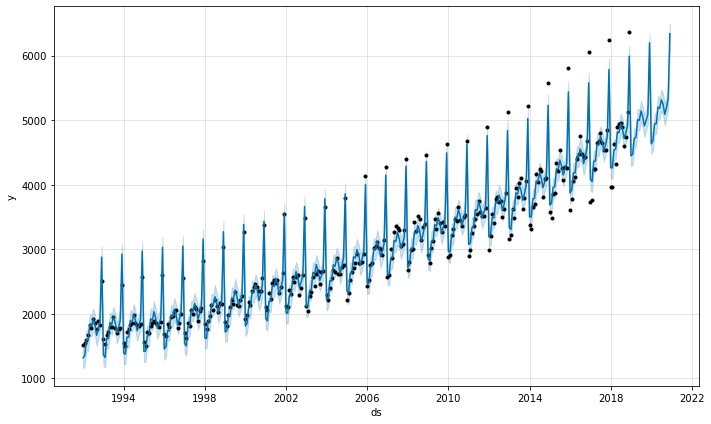

In [17]:
m.plot(forecast);

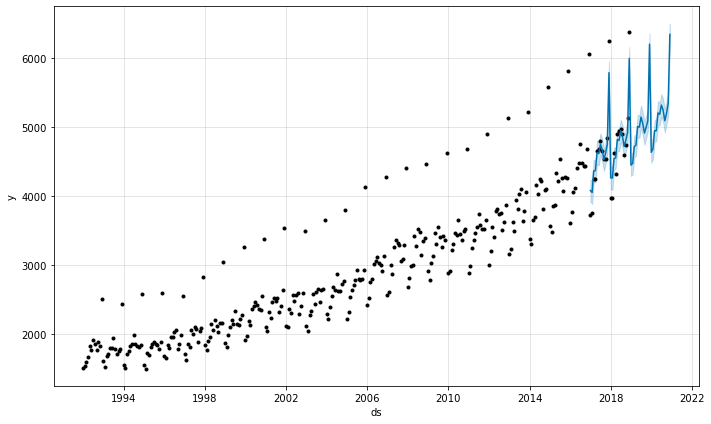

In [22]:
import matplotlib.pyplot as plt
m.plot(forecast[300:]);
#plt.xlim('2014-01-01','2022-01-01')

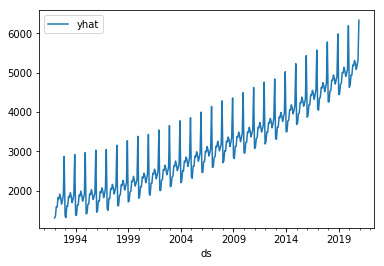

In [19]:
forecast.plot(x='ds',y='yhat')

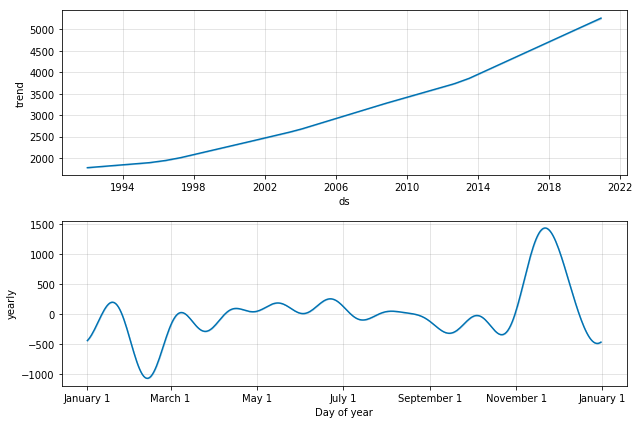

In [20]:
m.plot_components(forecast);


## Great Job!